<a href="https://colab.research.google.com/github/ahmdhqnn/KAT-Praktikum/blob/main/Week2/Assignment_Modul_Minggu_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modul 2

In [ ]:
import pandas as pd
df = pd.read_csv('matches.csv')
df.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,0,2020-09-21,20:15 (21:15),Premier League,Matchweek 2,Mon,Away,W,3,1,...,Match Report,NaN,13,8,21.1,2,1,1,2024,Manchester City
1,2,2020-09-27,16:30 (17:30),Premier League,Matchweek 3,Sun,Home,L,2,5,...,Match Report,NaN,16,5,19.8,1,0,0,2024,Manchester City
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City


Soal 1


In [ ]:
df.isna().sum()

for col in df.columns:
  percentanged = df[col].isna().sum() * 100 / len(df)
  print(f'{col}:{percentanged}%')

  df['attendance'].fillna(df['attendance'].mean())
  df['attendance'].isna().sum()

Unnamed: 0:0.0%
date:0.0%
time:0.0%
comp:0.0%
round:0.0%
day:0.0%
venue:0.0%
result:0.0%
gf:0.0%
ga:0.0%
opponent:0.0%
xg:0.0%
xga:0.0%
poss:0.0%
attendance:34.10609857978279%
captain:0.0%
formation:0.0%
referee:0.0%
match report:0.0%
notes:100.0%
sh:0.0%
sot:0.0%
dist:0.04177109440267335%
fk:0.0%
pk:0.0%
pkatt:0.0%
season:0.0%
team:0.0%


Soal 2

In [ ]:
df_copy = df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normal_col = ['xg', 'xga', 'poss', 'sh', 'sot']

scaler = MinMaxScaler()

for col in normal_col:
  df_copy[col] = scaler.fit_transform(df_copy[[col]])


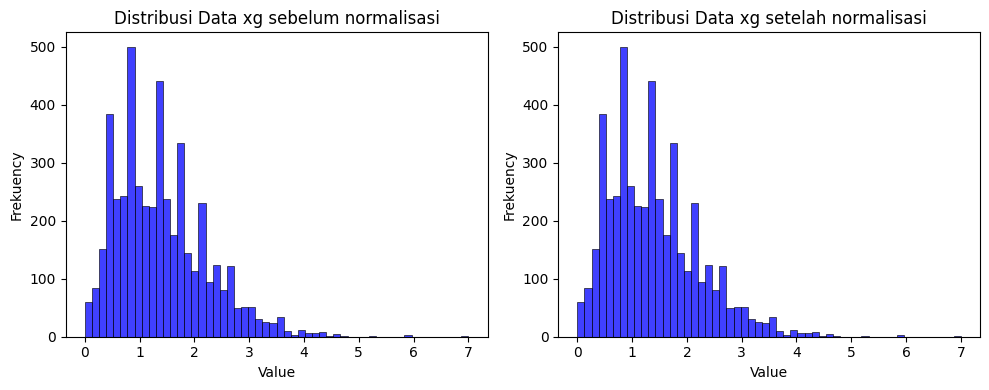

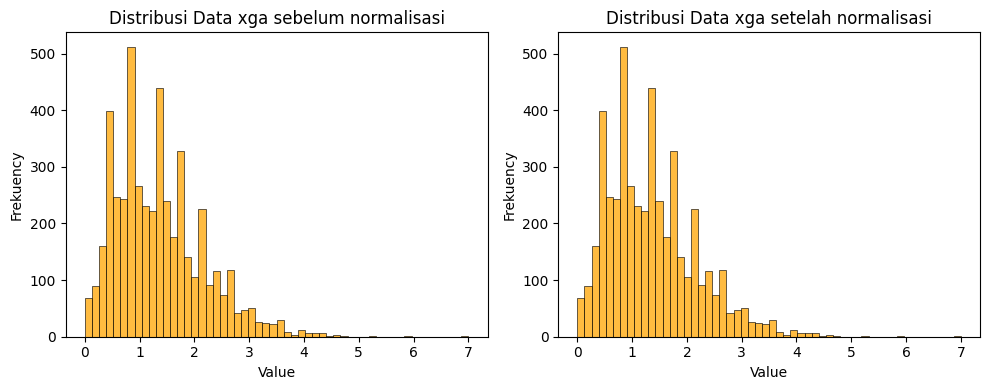

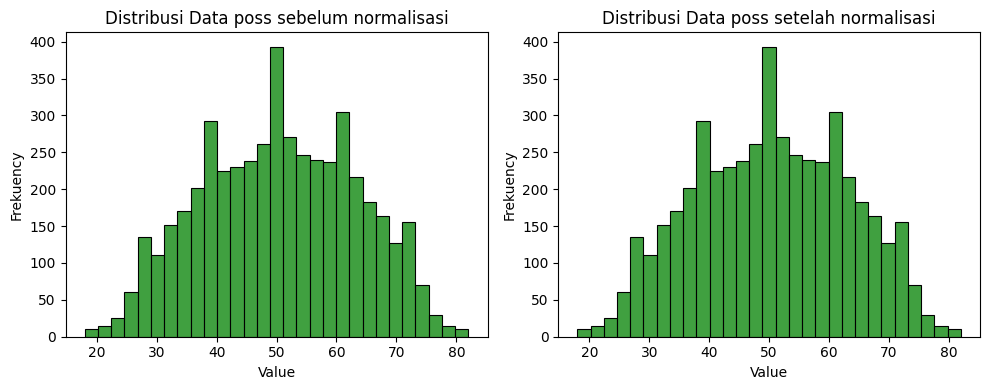

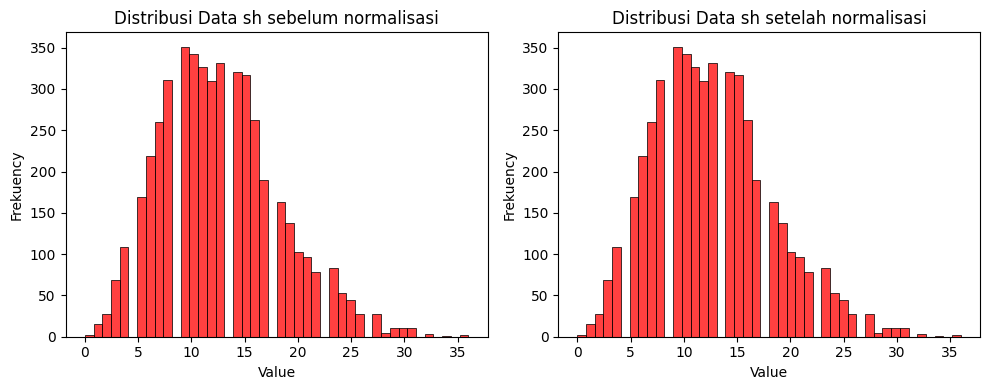

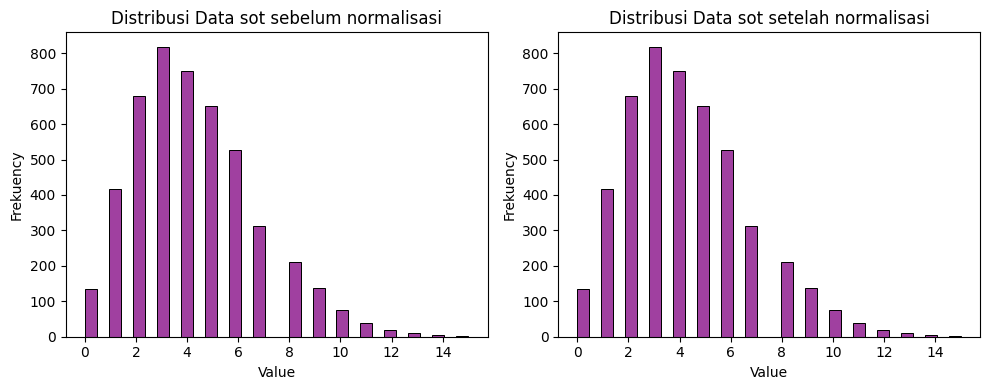

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, col in enumerate(normal_col):
  fig, axes = plt.subplots(1, 2, figsize=(10, 4))

  sns.histplot(df[col], color = colors[i % len(colors)], ax = axes[0])
  axes[0].set_title(f"Distribusi Data {col} sebelum normalisasi")

  sns.histplot(df[col], color = colors[i % len(colors)], ax = axes[1])
  axes[1].set_title(f"Distribusi Data {col} setelah normalisasi")

  for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Frekuency")

  plt.tight_layout()
  plt.show()

Soal 3

In [ ]:
filter_sabtu = df['day'] == 'Sat'
filter_minggu = df['day'] == 'Sun'

filter_venue = df['venue'] == 'Home'
filter_sot = df['sot'] > 5

df_filter = df[filter_sabtu | filter_minggu & filter_sot & filter_venue]
df_filter

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
2,4,2020-10-03,17:30 (18:30),Premier League,Matchweek 4,Sat,Away,D,1,1,...,Match Report,NaN,23,1,18.2,1,0,0,2024,Manchester City
3,5,2020-10-17,17:30 (18:30),Premier League,Matchweek 5,Sat,Home,W,1,0,...,Match Report,NaN,13,5,17.7,0,0,0,2024,Manchester City
4,7,2020-10-24,12:30 (13:30),Premier League,Matchweek 6,Sat,Away,D,1,1,...,Match Report,NaN,14,7,20.9,1,0,0,2024,Manchester City
5,9,2020-10-31,12:30 (14:30),Premier League,Matchweek 7,Sat,Away,W,1,0,...,Match Report,NaN,16,8,18.5,2,0,0,2024,Manchester City
7,12,2020-11-21,17:30 (19:30),Premier League,Matchweek 9,Sat,Away,L,0,2,...,Match Report,NaN,22,5,16.0,0,0,0,2024,Manchester City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,77,2020-02-15,17:30 (19:30),Premier League,Matchweek 26,Sat,Home,L,0,1,...,Match Report,NaN,5,1,16.5,0,0,0,2020,Norwich City
4778,81,2020-03-07,15:00 (17:00),Premier League,Matchweek 29,Sat,Away,L,0,1,...,Match Report,NaN,12,4,14.8,0,0,0,2020,Norwich City
4782,86,2020-07-04,12:30 (13:30),Premier League,Matchweek 33,Sat,Home,L,0,1,...,Match Report,NaN,12,1,18.4,0,0,0,2020,Norwich City
4784,88,2020-07-11,12:30 (13:30),Premier League,Matchweek 35,Sat,Home,L,0,4,...,Match Report,NaN,11,2,19.8,1,0,0,2020,Norwich City


In [ ]:
home_wins = (df['result'] == 'W').sum()
total_matches = len(df)

home_win_percentage = (home_wins / total_matches) * 100 if total_matches > 0 else 0

print("Persentase pertandingan yang dimenangkan oleh tim tuan rumah:", home_win_percentage, "%")
df_filtered_display = df_filter[['date', 'team', 'opponent', 'sot', 'gf', 'ga', 'result']]
df_filtered_display


Persentase pertandingan yang dimenangkan oleh tim tuan rumah: 39.578111946533 %


,date,team,opponent,sot,gf,ga,result
2,2020-10-03,Manchester City,Leeds United,1,1,1,D
3,2020-10-17,Manchester City,Arsenal,5,1,0,W
4,2020-10-24,Manchester City,West Ham,7,1,1,D
5,2020-10-31,Manchester City,Sheffield Utd,8,1,0,W
7,2020-11-21,Manchester City,Tottenham,5,0,2,L
...,...,...,...,...,...,...,...
4775,2020-02-15,Norwich City,Liverpool,1,0,1,L
4778,2020-03-07,Norwich City,Sheffield Utd,4,0,1,L
4782,2020-07-04,Norwich City,Brighton,1,0,1,L
4784,2020-07-11,Norwich City,West Ham,2,0,4,L
